In [2]:
# stdlib
import math, sys, importlib
    
# packages
import numpy as np
from numpy import sqrt, pi
import matplotlib.pyplot as plt
from scipy import interpolate as interp
from scipy.integrate import quad, odeint
import scipy.constants as c
import scipy.optimize as opt

# local modules
from config import model, plot_path
import g_star

g_star = importlib.reload(g_star)

## Find a good Interpolator

In [3]:
def test_interpolator(interpolator):
    g_rho_interp = interpolator(g_star.T, g_star.g_rho_paper)
    g_s_interp = interpolator(g_star.T, g_star.g_s_paper)
    #plt.figure(figsize=(10, 5))
    N = 400
    T = np.logspace(np.log10(np.min(g_star.T)), np.log10(np.max(g_star.T)), N)
    
    plt.semilogx(T, g_rho_interp(T), "-b", label=r"$g_\rho$ Interpolated")
    plt.semilogx(T, g_s_interp(T), "--r", label=r"$g_\rho$ Interpolated")
    
    plt.semilogx(g_star.T, g_star.g_rho_paper, "*b", label=r"$g_\rho$ Data")
    plt.semilogx(g_star.T, g_star.g_s_paper, "+r", label=r"$g_s$ Data")

    plt.legend()
    plt.grid()
    plt.xlabel("T / eV")
    plt.ylabel("g")
    
    return g_rho_interp, g_s_interp

(<scipy.interpolate._cubic.CubicSpline at 0x7eff9329d258>,
 <scipy.interpolate._cubic.CubicSpline at 0x7eff9329d3b8>)

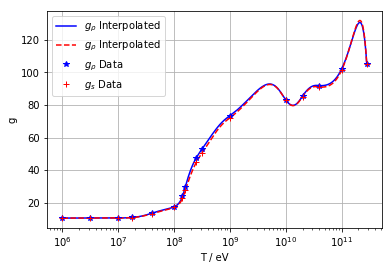

In [4]:
test_interpolator(interp.CubicSpline) # too many bumps

(<scipy.interpolate.interpolate.interp1d at 0x7eff90faf9a8>,
 <scipy.interpolate.interpolate.interp1d at 0x7eff90fafae8>)

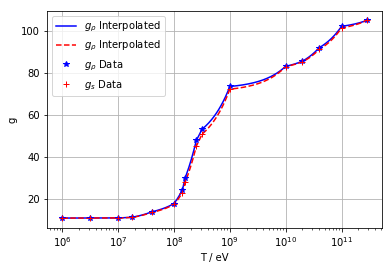

In [5]:
test_interpolator(interp.interp1d) # no derivative

(<scipy.interpolate._cubic.Akima1DInterpolator at 0x7eff90dd19e8>,
 <scipy.interpolate._cubic.Akima1DInterpolator at 0x7eff90dd1a98>)

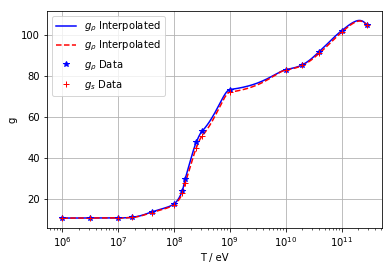

In [6]:
test_interpolator(interp.Akima1DInterpolator) # ok, little bump at the end

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/polyint.py:609: RuntimeWarning: divide by zero encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


(<scipy.interpolate.polyint.BarycentricInterpolator at 0x7eff90e6c4a8>,
 <scipy.interpolate.polyint.BarycentricInterpolator at 0x7eff90fdb458>)

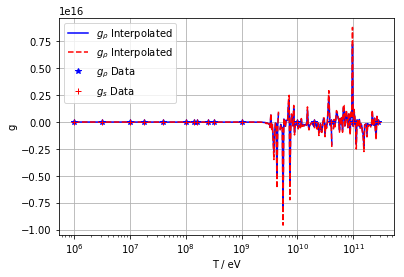

In [7]:
test_interpolator(interp.BarycentricInterpolator) # oh

(<scipy.interpolate.polyint.KroghInterpolator at 0x7f19f5910598>,
 <scipy.interpolate.polyint.KroghInterpolator at 0x7f19f5acb408>)

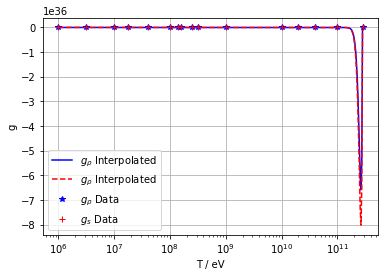

In [7]:
test_interpolator(interp.KroghInterpolator) # ooooh

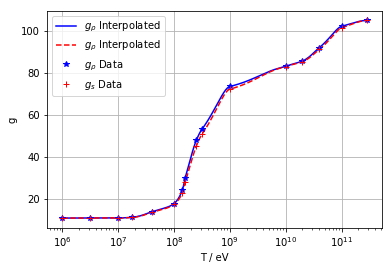

In [8]:
# ok, this one also uses cubic splines but only monotonic ones, therefore there are no bunmps
test_interpolator(interp.PchipInterpolator) 
plt.savefig(plot_path + "/g_plot.pdf")

In [9]:
# float(g_rho_interp.derivative()(1e9)) # how to get the derivative

### Fix g_star data

Text(0.5,0,'T [MeV]')

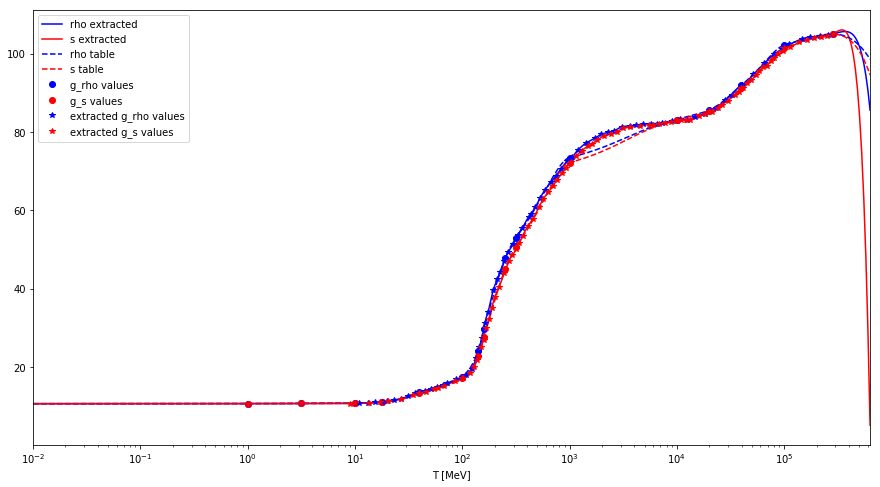

In [8]:
plt.figure(figsize=(15, 8))
lower_pow = -2
upper_pow = 5.8
T = np.logspace(lower_pow, upper_pow, 400) *  1e6
plt.semilogx(T / 1e6, g_star.borsamyi_table.g_rho(T), "-", color="blue", label="rho extracted")
plt.semilogx(T / 1e6, g_star.borsamyi_table.g_s(T), "-", color="red", label="s extracted")
plt.semilogx(T / 1e6, g_star.borsamyi_paper_table.g_rho(T), "--", color="blue", label="rho table")
plt.semilogx(T / 1e6, g_star.borsamyi_paper_table.g_s(T), "--", color="red", label="s table")
plt.semilogx(g_star.T / 1e6, g_star.g_rho_paper, "o", color="blue", label="g_rho values")
plt.semilogx(g_star.T / 1e6, g_star.g_s_paper, "o", color="red", label="g_s values")
plt.semilogx(g_star.T_g_rho / 1e6, g_star.g_rho, "*", color="blue", label="extracted g_rho values")
plt.semilogx(g_star.T_g_s / 1e6, g_star.g_s, "*", color="red", label="extracted g_s values")
plt.legend()
plt.xlim(10**lower_pow, 10**upper_pow)
#plt.ylim(0, 40)
plt.xlabel("T [MeV]")

## Shellard

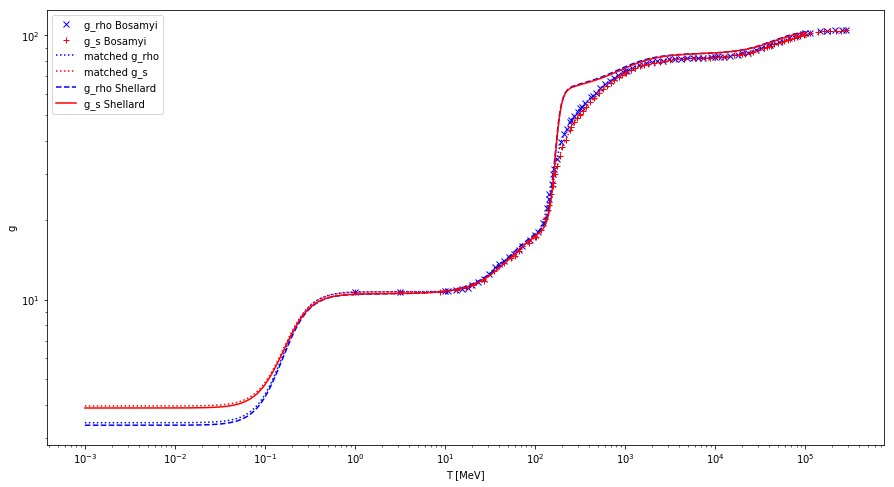

In [9]:
plt.figure(figsize=(15,8))
plot_type = plt.loglog
T = np.logspace(-6, 2, 400) * 1e9

plot_type(g_star.T_g_rho / 1e6, g_star.g_rho, "bx", label="g_rho Bosamyi")
plot_type(g_star.T_g_s / 1e6, g_star.g_s, "r+", label="g_s Bosamyi")

plot_type(T / 1e6, list(map(g_star.matched.g_rho, T)), "b:", label="matched g_rho")
plot_type(T / 1e6, list(map(g_star.matched.g_s, T)), "r:", label="matched g_s")

plot_type(T / 1e6, list(map(g_star.shellard_fit.g_rho, T)), "b--", label="g_rho Shellard")
plot_type(T / 1e6, list(map(g_star.shellard_fit.g_s, T)), "r-", label="g_s Shellard")
plt.xlabel("T [MeV]")
plt.ylabel("g")
plt.legend()

Text(0.5,0,'T [MeV]')

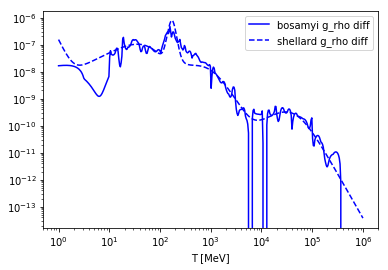

In [10]:
T = np.logspace(0, 6, 400) * 1e6
plt.loglog(T / 1e6, g_star.borsamyi_table.g_rho_diff(T), "b-", label="bosamyi g_rho diff")
plt.loglog(T / 1e6, list(map(g_star.shellard_fit.g_rho_diff, T)), "b--", label="shellard g_rho diff")
plt.legend()
plt.xlabel("T [MeV]")

Text(0.5,0,'T [MeV]')

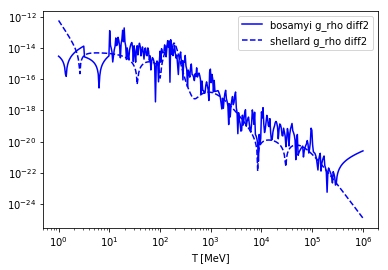

In [11]:
T = np.logspace(0, 6, 400) * 1e6
plt.loglog(T / 1e6, np.abs(g_star.borsamyi_table.g_rho_diff2(T)), "b-", label="bosamyi g_rho diff2")
plt.loglog(T / 1e6, np.abs(np.array(list(map(g_star.shellard_fit.g_rho_diff2, T)))), "b--", label="shellard g_rho diff2")
plt.legend()
plt.xlabel("T [MeV]")

In [13]:
def array_map(f, xs): return np.array(list(map(f, xs)))

In [14]:
def target(T, T_nu):
    a = T_nu / T
    G = g_star.matched.g_rho(T) / g_star.matched.g_s(T)
    return G - (2 + 7/8*6*a**4) / (2 + 7/8*6*a**3)

def find_T_neutrino(T):
    sol = opt.root(lambda T_nu: target(T, T_nu), 1) # (4 / 11)**(1/3))
    assert sol.success
    return sol.x[0] / T

def target2(T, T_nu):
    a = T_nu / T
    return g_star.matched.g_rho(T) - g_star.matched.g_s(T) - 7/8*6*(a**4 - a**3) 

def find_T_neutrino2(T):
    sol = opt.root(lambda T_nu: target2(T, T_nu), (4 / 11)**(1/3))
    if not sol.success: return 0# np.NAN
    return sol.x[0] / T

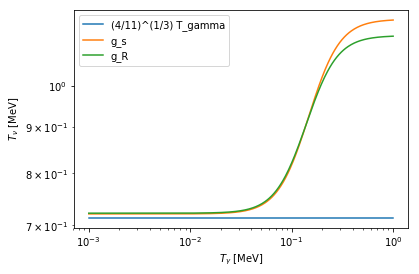

In [15]:
T = np.logspace(-3, 0, 400) * 1e6
plt.loglog(T / 1e6, (4 / 11)**(1/3) * np.ones(T.size), label="(4/11)^(1/3) T_gamma")
plt.loglog(T / 1e6, (8*(array_map(g_star.matched.g_s, T) - 2) / (7*6))**(1/3), label="g_s")
plt.loglog(T / 1e6, (8*(array_map(g_star.matched.g_rho, T) - 2) / (7*6))**(1/4), label="g_R")
#plt.loglog(T / 1e6, array_map(find_T_neutrino, T), label="G")
#plt.loglog(T / 1e6, array_map(find_T_neutrino2, T), label="diff")
plt.xlabel(r"$T_\gamma$ [MeV]")
plt.ylabel(r"$T_\nu$ [MeV]")
plt.legend()

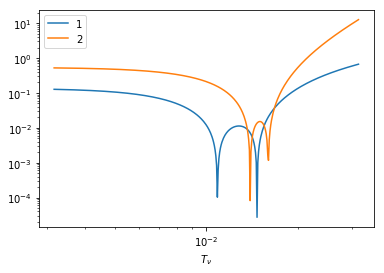

In [16]:
T = 2e-2 * 1e6
T_nu = np.logspace(-2.5, -1.5, 400) * 1e6
plt.loglog(T_nu / 1e6, np.abs(array_map(lambda T_nu: target(T, T_nu), T_nu)), label="1")
plt.loglog(T_nu / 1e6, np.abs(array_map(lambda T_nu: target2(T, T_nu), T_nu)), label="2")
plt.xlabel(r"$T_\nu$")
plt.legend()